In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

In [4]:
# https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
from matplotlib.ticker import FuncFormatter

## 코스피 종목코드 수집

+ 코스피 종목코드 : https://gist.github.com/allieus/733725662c644ab56c9db9d3cdf77ed1

In [7]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://gist.githubusercontent.com/allieus/733725662c644ab56c9db9d3cdf77ed1/raw/1c8bda399d98240fc02b97120cafa1ec7fd70f70/kospi.csv", index_col='종목명', dtype={'종목코드': str}) # dtype이 없을 경우 앞에 0이 빠짐
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [9]:
kospi_series = kospi_df['종목코드']

## 3개 종목의 일별 거래량 크롤링

In [11]:
code = kospi_series['삼성전자']
삼성전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['LG전자']
LG전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

In [12]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['종가'],
    'LG전자': LG전자_volume_df['종가'],
    'SK하이닉스': SK하이닉스_volume_df['종가'],
})
print(df.shape)
df.head()

(90, 3)


,삼성전자,LG전자,SK하이닉스
날짜,,,
2020-04-24,49350.0,52600.0,81400.0
2020-04-23,49850.0,53300.0,82600.0
2020-04-22,49850.0,52400.0,83900.0
2020-04-21,49250.0,52600.0,81300.0
2020-04-20,50100.0,53800.0,82000.0


## 시각화

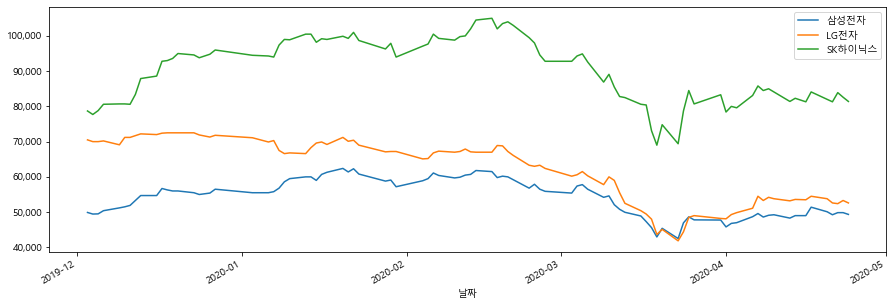

In [13]:
ax = df.plot(figsize=(15, 5))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: '{:,}'.format(int(y))))